<a href="https://colab.research.google.com/github/sanketpadwal/GCDAI_INSAID_JAN20/blob/main/sanketpadwal_gmail_com_Term5_ML_Advanced_Project_IOT-temp_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np

# import warnings  
# warnings.filterwarnings('ignore')

In [3]:
# # Install kaggle package
# %%time
# !pip install -q kaggle

CPU times: user 17 ms, sys: 7.31 ms, total: 24.3 ms
Wall time: 3.44 s


In [5]:
# import json
# import zipfile
# import os

In [15]:
# api_token = {"username":"<usename>","key":"<key>"}
# !mkdir -p ~/.kaggle
# with open('kaggle.json', 'w') as file:
#     json.dump(api_token, file)
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [7]:
!kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    7MB  2021-02-15 06:07:04            900  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           1289  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            160  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            120  
timoboz/superbowl-history-1967-2020                       Superbowl History 1967 - 2020                  2KB  2020-02-

In [10]:
!kaggle datasets list -s temperature

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
wkirgsn/electric-motor-temperature                           Electric Motor Temperature                           47MB  2019-06-19 11:12:41          11700  
sevgisarac/temperature-change                                Temperature change                                  778KB  2020-12-24 20:06:36           2674  
atulanandjha/temperature-readings-iot-devices                Temperature Readings : IOT Devices                    1MB  2019-12-01 18:48:54           3998  
berkeleyearth/climate-change-earth-surface-temperature-data  Climate Change: Earth Surface Temperature Data       85MB  2017-05-01 17:29:10          63537  
sudalairajkumar/daily-temperature-of-major-cities         

In [11]:
%%time
!kaggle datasets download -d atulanandjha/temperature-readings-iot-devices -p /content

  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 34.1MB/s]
CPU times: user 7.46 ms, sys: 4.14 ms, total: 11.6 ms
Wall time: 916 ms


In [12]:
%%time
!unzip \*.zip

Archive:  temperature-readings-iot-devices.zip
  inflating: IOT-temp.csv            
CPU times: user 4.32 ms, sys: 3.36 ms, total: 7.68 ms
Wall time: 113 ms


In [14]:
# Load Data

data = pd.read_csv('IOT-temp.csv')
data.head(8)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
5,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In
6,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In
7,__export__.temp_log_196122_f8b80a9f,Room Admin,08-12-2018 09:28,29,In


In [ ]:
# # Load Data

# data = pd.read_csv('https://raw.githubusercontent.com/sanketpadwal/GCDAI_INSAID_JAN20/main/Term5/daily-website-visitors.csv')
# data.head(8)

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
5,6,Friday,6,9/19/2014,"2,815","1,863","1,622",241
6,7,Saturday,7,9/20/2014,"1,658","1,118",985,133
7,8,Sunday,1,9/21/2014,"2,288","1,656","1,481",175


In [ ]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [ ]:
# Size of the data
data.shape

(2167, 8)

In [ ]:
# Data unique Values
data.nunique()

Row                  2167
Day                     7
Day.Of.Week             7
Date                 2167
Page.Loads           1756
Unique.Visits        1658
First.Time.Visits    1587
Returning.Visits      663
dtype: int64

In [ ]:
data = data.replace(',','', regex=True)

In [ ]:
data[['Page.Loads','Unique.Visits','First.Time.Visits','First.Time.Visits','Returning.Visits']]=data[['Page.Loads','Unique.Visits','First.Time.Visits','First.Time.Visits','Returning.Visits']].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   int64 
 5   Unique.Visits      2167 non-null   int64 
 6   First.Time.Visits  2167 non-null   int64 
 7   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 135.6+ KB


In [ ]:
data.drop(columns=['Row','Day'],inplace=True)

In [ ]:
data.head()

,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,9/14/2014,2146,1582,1430,152
1,2,9/15/2014,3621,2528,2297,231
2,3,9/16/2014,3698,2630,2352,278
3,4,9/17/2014,3667,2614,2327,287
4,5,9/18/2014,3316,2366,2130,236


In [ ]:
data.isnull().sum()

Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Day.Of.Week,2167.0,3.997231,2.000229,1.0,2.0,4.0,6.0,7.0
Page.Loads,2167.0,4116.989386,1350.977843,1002.0,3114.5,4106.0,5020.5,7984.0
Unique.Visits,2167.0,2943.646516,977.886472,667.0,2226.0,2914.0,3667.5,5541.0
First.Time.Visits,2167.0,2431.824181,828.704688,522.0,1830.0,2400.0,3038.0,4616.0
Returning.Visits,2167.0,511.822335,168.736370,133.0,388.5,509.0,626.5,1036.0


In [ ]:
data.skew()

Day.Of.Week          0.002078
Page.Loads           0.115431
Unique.Visits        0.085521
First.Time.Visits    0.097117
Returning.Visits     0.146314
dtype: float64

In [ ]:
data.kurt()

Day.Of.Week         -1.249704
Page.Loads          -0.509445
Unique.Visits       -0.584691
First.Time.Visits   -0.630258
Returning.Visits    -0.404842
dtype: float64

In [ ]:
data.columns

Index(['Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [ ]:
data[['M','D','Y']] = data.Date.str.split('/',expand=True)

In [ ]:
data['Day'] = data[['Y','M','D']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)

In [ ]:
data.Day = pd.to_datetime(data['Day'],format='%Y-%m-%d')

In [ ]:
data.drop(columns=['Date','Y','M','D'],inplace=True)

In [ ]:
data = data[['Day','Day.Of.Week','Page.Loads','Unique.Visits','First.Time.Visits','Returning.Visits']]

In [ ]:
data.head()

,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,2014-09-14,1,2146,1582,1430,152
1,2014-09-15,2,3621,2528,2297,231
2,2014-09-16,3,3698,2630,2352,278
3,2014-09-17,4,3667,2614,2327,287
4,2014-09-18,5,3316,2366,2130,236


In [ ]:
model_columns = data.columns[2:6]
# model_columns.remove('Day')
# model_columns.remove('Day.Of.Week')

In [ ]:
model_columns

Index(['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits'], dtype='object')

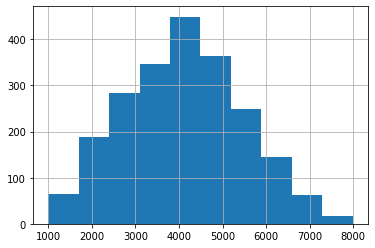

In [ ]:
data['Page.Loads'].hist()


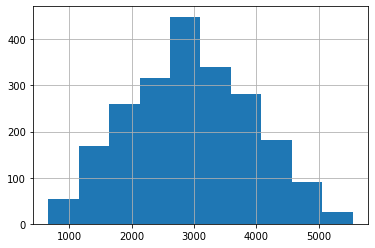

In [ ]:
data['Unique.Visits'].hist()

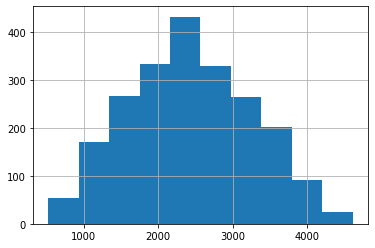

In [ ]:
data['First.Time.Visits'].hist()

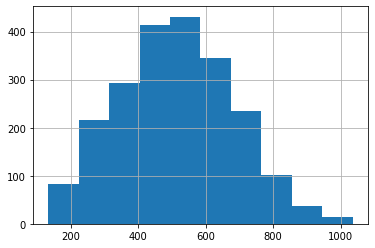

In [ ]:
data['Returning.Visits'].hist()

# Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(data[model_columns])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [ ]:
pred = clf.predict(data[model_columns])
data['anomaly']=pred
outliers=data.loc[data['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data['anomaly'].value_counts())

 1    1709
-1     458
Name: anomaly, dtype: int64


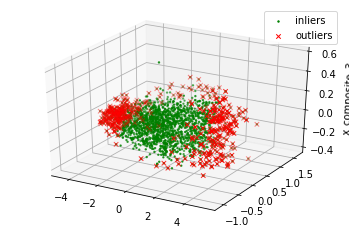

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(data[model_columns])
X_reduce = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=2, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],lw=1, s=20, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

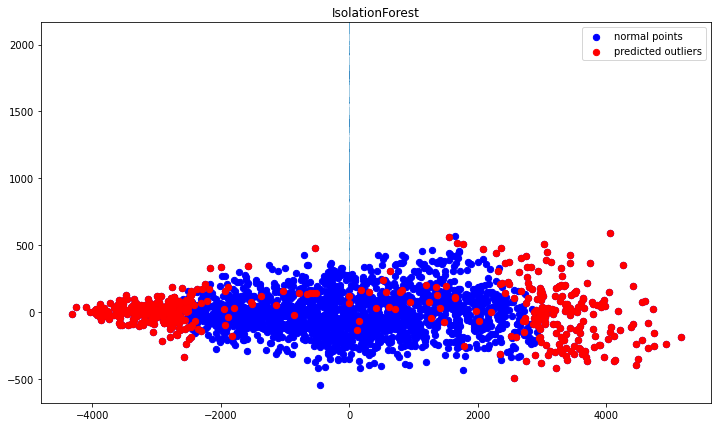

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(data[model_columns])


res=pd.DataFrame(pca.transform(data[model_columns]))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='blue',
                 s=40,label="normal points")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',s=40,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [ ]:
!pip install -q plotly.express

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# import plotly.offline as pyo
# pyo.init_notebook_mode()
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
def plot_anomaly(df,metric_name):
    df.Date = pd.to_datetime(df['Day'].astype(str), format="%Y-%m-%d")
    dates = df.Day
    #identify the anomaly points and create a array of its values for plot
    bool_array = (abs(df['anomaly']) > 0)
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
    #A dictionary for conditional format table based on anomaly
    color_map = {0: "gray", 1: "yellow", 2: "red"}
    
    #Table which includes Date,Actuals,Change occured from previous point
    table = go.Table(domain=dict(x=[0, 1], y=[0, 0.3]), columnwidth=[1, 2],
        # columnorder=[0, 1, 2,],
        header=dict(height=20, values=[['<b>Date</b>'], ['<b>Actual Values </b>'], ['<b>% Change </b>'],], font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                    fill=dict(color='#d562be')),
        cells=dict(values=[df.round(3)[k].tolist() for k in ['Day', 'actuals', 'percentage_change']], line=dict(color='#506784'), align=['center'] * 5,
                   font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                   # format = [None] + [",.4f"] + [',.4f'],
                   # suffix=[None] * 4,
                   suffix=[None] + [''] + [''] + ['%'] + [''],
                   height=27, fill=dict(color=[test_df['anomaly_class'].map(color_map)],)))#map based on anomaly level from dictionary
    #Plot the actuals points
    Actuals = go.Scatter(name='Actuals', x=dates, y=df['actuals'], xaxis='x1', yaxis='y1', marker=dict(size=12, line=dict(width=1), color="blue"))

    #Highlight the anomaly points
    anomalies_map = go.Scatter(name="Anomaly", showlegend=True, x=dates, y=anomaly_points, mode='markers', xaxis='x1', yaxis='y1',
                               marker=dict(color="red", size=11, line=dict(color="red",width=2)))


    axis = dict(showline=True, zeroline=False, showgrid=True, mirror=True, ticklen=4, gridcolor='#ffffff', tickfont=dict(size=10))

    layout = dict(width=1000, height=865, autosize=False, title=metric_name, margin=dict(t=75), showlegend=True, xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
        yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20, 1], anchor='x1', hoverformat='.2f')))

    fig = go.Figure(data=[table, anomalies_map, Actuals], layout=layout)

    iplot(fig)
    pyplot.show()

In [ ]:
def classify_anomalies(df,metric_name):
    df['metric_name']=metric_name
    df = df.sort_values(by='Day', ascending=True)
    #Shift actuals by one timestamp to find the percentage chage between current and previous data point
    df['shift'] = df['actuals'].shift(-1)
    df['percentage_change'] = ((df['actuals'] - df['shift']) / df['actuals']) * 100
    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    medium_percentile = df['score'].quantile(0.24)
    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

In [ ]:
# !pip uninstall plotly
# !pip install plotly==2.7.0

In [ ]:
# warnings.filterwarnings('ignore')
for i in range(2,len(data.columns)-1):
    clf.fit(data.iloc[:,i:i+1])
    pred = clf.predict(data.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['Day']=data['Day']
    #Find decision function to find the score and classify anomalies
    test_df['score']=clf.decision_function(data.iloc[:,i:i+1])
    test_df['actuals']=data.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    test_df=classify_anomalies(test_df,data.columns[i])
    plot_anomaly(test_df,data.columns[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Pandas doesn't all

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Pandas doesn't all

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Pandas doesn't all

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Pandas doesn't all

In [ ]:
test_df

In [ ]:
model_columns[1]